### Gino's playground

In [59]:
# IMPORTS
import datadotworld as dw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys; sys.path.append("./libraries/")
from utils import *

In [69]:
# Datasets
valuations = pd.read_csv('https://query.data.world/s/y4qg2twfvou4w2ghz6o3evju32g7yn?dws=00000') 
players = pd.read_csv('https://query.data.world/s/gksm6hx4xzgjaed7tia2uzpafwvyjo?dws=00000')
ratings22 = pd.read_csv("../data/raw/FIFA22_player_ratings.csv") # FIFA player attributes from 2022
ratings21 = pd.read_csv("../data/raw/FIFA21_player_ratings.csv") # FIFA player attributes from 2021
# This appends players from 2021 not present in 2022
extended = set(ratings21.sofifa_id).difference(set(ratings22.sofifa_id))
FIFA = pd.concat([ratings22, ratings21[ratings21.sofifa_id.isin(extended)]]).reset_index(drop=True)

process = False

C:\Users\ginof\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [70]:
# Remove uninformative columns
players.drop(["player_code", "agent_name", "image_url", "url"], axis=1, inplace=True)
FIFA.drop(["player_url", "club_team_id", "club_position", "club_jersey_number", "club_loaned_from", "club_joined", 
              "nationality_id", "nation_team_id", "nation_jersey_number", "real_face", "player_tags", "player_face_url", 
              "club_logo_url", "club_flag_url", "nation_logo_url", "nation_flag_url"], axis=1, inplace=True)

In [72]:
if process:
    # Find matches
    longname_matches = match_players(players, FIFA)
    # Append the extracted FIFA long names
    players["FIFA_long_name"] = longname_matches
    # Re arrange columns
    players = players[list(players.columns[:4]) + [players.columns[-1]] + list(players.columns[4:-1])]
else:
    players = pd.read_csv("../data/processed/players_wFIFAnames.csv")

In [75]:
players["fifa_id"] = players["FIFA_long_name"] + "-" + pd.to_datetime(players["date_of_birth"]).dt.year.astype(str)
FIFA["fifa_id"] = FIFA.long_name + "-" + pd.to_datetime(FIFA["dob"]).dt.year.astype(str)

final = players.merge(FIFA, on="fifa_id", how="inner")
print(final.shape)
final.head()

(11159, 115)


,player_id,first_name,last_name,name,FIFA_long_name,last_season,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,3875,Jermain,Defoe,Jermain Defoe,Jermain Colin Defoe,2021,England,London,England,1982-10-07,...,43+2,43+2,43+2,43+2,40+2,38+2,38+2,38+2,40+2,18+2
1,4742,Christophe,Lepoint,Christophe Lepoint,Christophe Lepoint,2022,Belgium,Brussel,Belgium,1984-10-24,...,68-1,68-1,68-1,62+2,62+2,67,67,67,62+2,16+2
2,6838,Henok,Goitom,Henok Goitom,Henok Goitom,2015,Sweden,Solna,Eritrea,1984-09-22,...,55+2,55+2,55+2,50+2,48+2,50+2,50+2,50+2,48+2,17+2
3,10003,Wes,Morgan,Wes Morgan,Wes Morgan,2020,England,Nottingham,Jamaica,1984-01-21,...,64+2,64+2,64+2,54+2,57+2,73,73,73,57+2,16+2
4,10471,NaN,Luiz Gustavo,Luiz Gustavo,Luiz Gustavo Dias,2021,Brazil,Pindamonhangaba,Brazil,1987-07-23,...,75+2,75+2,75+2,71+3,71+3,75+2,75+2,75+2,71+3,17+3


In [76]:
#final.to_csv("../data/processed/players_wFIFAattributes.csv", index=False)

In [12]:
# Calculate players age to the data of data collection
players["age"] = players.date_of_birth.apply(lambda x: calculate_age(x))

(array([ 988., 5111., 6719., 6523., 3457., 3255., 1741.,  534.,   80.,
           9.]),
 array([14. , 17.8, 21.6, 25.4, 29.2, 33. , 36.8, 40.6, 44.4, 48.2, 52. ]),
 <BarContainer object of 10 artists>)

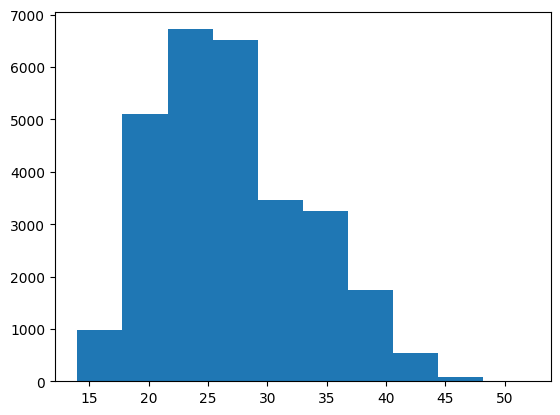

In [13]:
fig, ax = plt.subplots()

ax.hist(players.age)

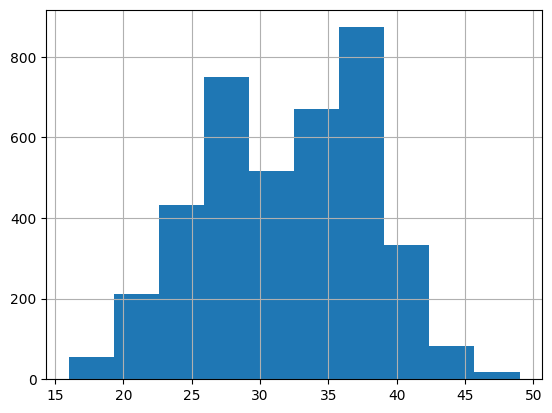

In [14]:
# Detect retired:
## Conditions:
### Last season < 2021
### No current club (NAN)
### No Market value in EUR (NAN)
### No Contract Expiration date (NAN)
players.loc[(players.last_season < 2021) & (players.current_club_name.isna()) & (players.market_value_in_eur.isna()) & (players.contract_expiration_date.isna()), "age"].hist();

In [15]:
players.loc[(players.last_season < 2021) & (players.current_club_name.isna()) & (players.market_value_in_eur.isna()) & (players.contract_expiration_date.isna()), "age"].count()

3942

In [16]:
players.loc[6739]

player_id                                       844356
first_name                                       Petro
last_name                                     Velychko
name                                    Petro Velychko
FIFA_long_name                                     NaN
last_season                                       2020
country_of_birth                                   NaN
city_of_birth                                      NaN
country_of_citizenship                         Ukraine
date_of_birth                               2004-08-28
sub_position                               Centre-Back
position                                      Defender
foot                                             right
height_in_cm                                     190.0
market_value_in_eur                                NaN
highest_market_value_in_eur                        NaN
contract_expiration_date                           NaN
current_club_domestic_competition_id              UKR1
current_cl

In [17]:
players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'FIFA_long_name',
       'last_season', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'current_club_domestic_competition_id', 'current_club_name', 'age'],
      dtype='object')

In [18]:
ratings22

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
